# Análisis del texto

In [14]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

df = pd.read_csv('tweets_public.csv', encoding='utf-16', index_col='tweet_id', sep=',')
df.columns.tolist()

['airline_sentiment',
 'is_reply',
 'reply_count',
 'retweet_count',
 'text',
 'tweet_coord',
 'tweet_created',
 'tweet_location',
 'user_timezone']

In [ ]:
len(d)

In [10]:
# Force datatime on the `tweet_created` column
df.tweet_created = pd.to_datetime(df.tweet_created)

# How many tweets do we have?
print("Number of tweets:", df.shape[0])

# Show first rows on dataframe
df.head(4)

Number of tweets: 7867


,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,
942743012337123328,positive,False,0,0,"""Los pilotos de Ryanair desconvocan la huelga ...",NaN,2017-12-18 13:07:04,NaN,Dublin
926857871916183553,positive,True,0,0,"@Iberia @lavecinarubia Si ,por favor las decla...",NaN,2017-11-04 17:05:11,NaN,NaN
936979305720090626,neutral,True,0,0,@Iberia Me dirías por favor que costo tiene?,NaN,2017-12-02 15:24:09,NaN,NaN
943983853802328064,negative,True,0,0,"@SupermanlopezN @Iberia @giroditalia Champion,...",NaN,2017-12-21 23:17:43,NaN,Central Time (US & Canada)


In [106]:
print(df['reply_count'].unique(),df['retweet_count'].unique())
df.drop(['retweet_count','reply_count'], axis=1).head(4)

[0] [0]


,tweet_created,airline_sentiment,is_reply,text,tweet_coord,tweet_location,user_timezone,newairline_sentiment
tweet_id,,,,,,,,
942743012337123328,2017-12-18 13:07:04,positive,False,"""Los pilotos de Ryanair desconvocan la huelga ...",NaN,NaN,Dublin,positive
926857871916183553,2017-11-04 17:05:11,positive,True,"@Iberia @lavecinarubia Si ,por favor las decla...",NaN,NaN,NaN,positive
936979305720090626,2017-12-02 15:24:09,neutral,True,@Iberia Me dirías por favor que costo tiene?,NaN,NaN,NaN,neutral
943983853802328064,2017-12-21 23:17:43,negative,True,"@SupermanlopezN @Iberia @giroditalia Champion,...",NaN,NaN,Central Time (US & Canada),negative


In [3]:
df['airline_sentiment'].unique()
counts = df.groupby('airline_sentiment').size()
print(counts) 

airline_sentiment
negative    3487
neutral     2085
positive    1241
dtype: int64


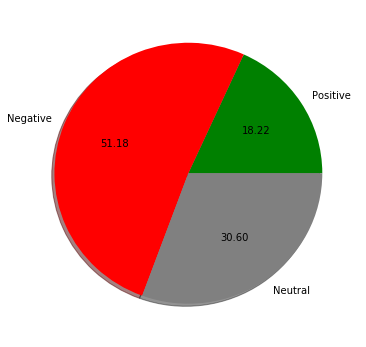

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.pie([counts[2],counts[0],counts[1]],labels=['Positive','Negative','Neutral'],colors=['g','r','gray'],shadow=True,autopct ='%.2f' )
fig = plt.gcf()
fig.set_size_inches(6,6)
#fig.savefig('figure.pdf', bbox_inches='tight')

*Data cleaning:*
- Convert all characters to lowercase
- Delete URLs and additional white spaces
- Transform emojis into "words": EMOPOS (positive emoji) or EMONEG (negative emoji)

In [11]:
def cleaning(tweet):
    #Convert to lower case
    tweet = tweet.lower()
    #Delete URLs www.* or https?://*
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
    #Remove additional white spaces
    tweet = re.sub('\s+', ' ', tweet)
    #Delete via and rt
    tweet = re.sub(r'rt','',tweet)
    tweet = re.sub(r'via','',tweet)
    tweet = re.sub(r'by','',tweet)
    # Remove numbers
    #tweet = re.sub(r'\d+','',tweet)
    # Remove punctuation (includes @ and #)
    #regex = re.compile('[%s]' % re.escape(string.punctuation+u"¡"+u"¿"+u"€"))
    #tweet = re.sub(regex,'',tweet)
    # Remove single characters
    tweet = re.sub(r'\b\w\b','',tweet)
    return tweet

df['text'] = df['text'].apply(cleaning)
df.head()

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,
942743012337123328,positive,False,0,0,"""los pilotos de ryanair desconvocan la huelga ...",NaN,2017-12-18 13:07:04,NaN,Dublin
926857871916183553,positive,True,0,0,"@iberia @lavecinarubia si ,por favor las decla...",NaN,2017-11-04 17:05:11,NaN,NaN
936979305720090626,neutral,True,0,0,@iberia me dirías por favor que costo tiene?,NaN,2017-12-02 15:24:09,NaN,NaN
943983853802328064,negative,True,0,0,"@supermanlopezn @iberia @giroditalia champion,...",NaN,2017-12-21 23:17:43,NaN,Central Time (US & Canada)
938207464457211904,negative,True,0,0,@safarrelldm @klm @iberia eso de anca es verda...,NaN,2017-12-06 00:44:25,NaN,Eastern Time (US & Canada)


# @Users and #Hashtags

Extract the users and the hashtags that appear in each tweet and store them in two new columns

In [12]:
def extract_users(tweet):
    users = re.findall(r'@\S\w*',tweet)
    usersnoarrova = [user[1:] for user in users]
    usersnoarrova = '|'.join(usersnoarrova)
    if len(users)==0 : usersnoarrova = np.nan
    return usersnoarrova
df['users'] = df['text'].apply(extract_users)

def extract_hashtags(tweet):
    hashtags = re.findall(r'#\S[^0-9]\w*',tweet)
    nohash = [hashtag[1:] for hashtag in hashtags]
    nohash = '|'.join(nohash)
    if len(hashtags)==0 : nohash = np.nan
    return nohash
df['hashtags'] = df['text'].apply(extract_hashtags)

# Drop data gaps in column 'hastags'
df2 = df.dropna(subset=['hashtags'])
df2.head()

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,users,hashtags
tweet_id,,,,,,,,,,,
926857871916183553,positive,True,0,0,"@iberia @lavecinarubia si ,por favor las decla...",NaN,2017-11-04 17:05:11,NaN,NaN,iberia|lavecinarubia,rubijarena
932856751099142144,positive,False,0,0,"con @iberia, mi destino un solo click. ¡desea...",NaN,2017-11-21 06:22:35,NaN,NaN,iberia,holacolombia
937549230994051073,positive,False,0,0,"con @iberia, mi destino un solo click. ¡desea...",NaN,2017-12-04 05:08:50,NaN,Central Time (US & Canada),iberia,holacolombia
931611760829792256,neutral,False,0,0,"con @iberia, mi destino un solo click. ¡desea...",NaN,2017-11-17 19:55:26,NaN,NaN,iberia,holaargentina
943844779976208384,neutral,False,0,0,ofea de #empleo #tcp: @iberia busca auxiliares...,NaN,2017-12-21 14:05:05,NaN,NaN,iberia,empleo|tcp|diciembre|madrid|barcelona


In [13]:
len(df2)

1323

In [8]:
df2.to_csv('tweets_public_with_airlines.csv', sep=',')

In [111]:
# Dataframe sentiment vs. hashtag
sentiment_hashtag = df2.set_index('airline_sentiment').hashtags.str.split(r'|', expand=True).stack().reset_index(level='airline_sentiment')
sentiment_hashtag.columns = ['airline_sentiment','hashtag']
# Dataframe hashtag vs. sentiment, where multiple hashtags have 
# replicated sentiments 
df3 = sentiment_hashtag.set_index('hashtag')
# One-hot encoding for airline sentiment
counted = pd.get_dummies(df3['airline_sentiment'])
histogram = counted.groupby('hashtag').sum()
histogram.tail(4)

,negative,neutral,positive
hashtag,,,
ánimo,1,0,0
ñublense,1,0,0
últimosegundo,1,0,0
…,0,1,0


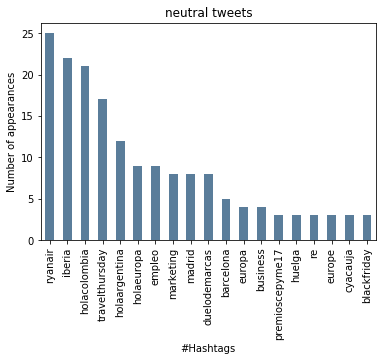

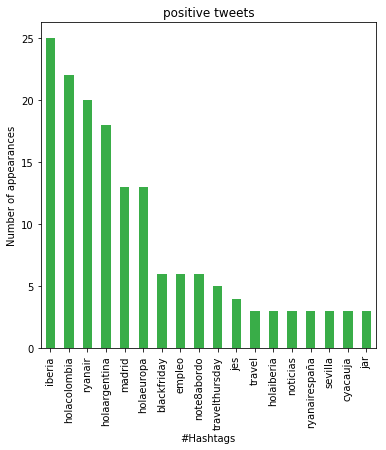

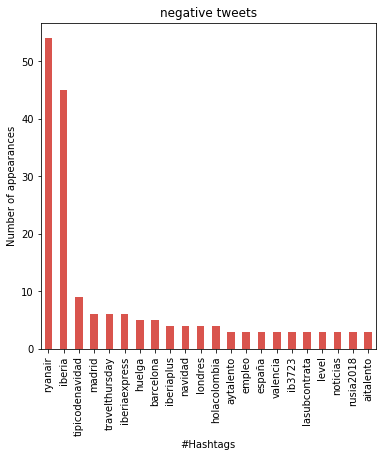

In [113]:
def plot_histo(key):
    subhisto = histogram[key]
    sortlargest = subhisto[histogram[key] > 2].sort_values(ascending=False)
    # Plot
    barcolor = {'positive':sns.xkcd_rgb["medium green"],'negative':sns.xkcd_rgb["pale red"],'neutral':sns.xkcd_rgb["steel blue"]}
    ax = sortlargest.plot(kind='bar',title=key+' tweets',color=barcolor[key])
    ax.set_ylabel('Number of appearances')
    ax.set_xlabel('#Hashtags')
    ax.set_xticks(np.arange(len(sortlargest)))
    ax.set_xticklabels(sortlargest.index.values, rotation=90)
    plt.show()
    
    fig = plt.gcf()
    fig.set_size_inches(6,6)
    fig.savefig('hashtags'+key+'.jpg', bbox_inches='tight',dpi=300)
    return

keys = ['neutral','positive','negative']
for key in keys:
    plot_histo(key)

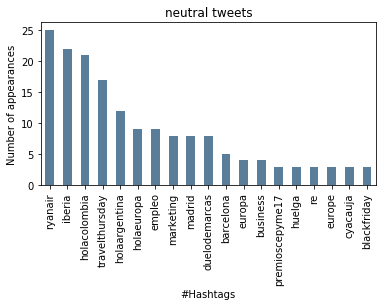

In [117]:
key = 'neutral'
subhisto = histogram[key]
sortlargest = subhisto[histogram[key] > 2].sort_values(ascending=False)
# Plot
barcolor = {'positive':sns.xkcd_rgb["medium green"],'negative':sns.xkcd_rgb["pale red"],'neutral':sns.xkcd_rgb["steel blue"]}
ax = sortlargest.plot(kind='bar',title=key+' tweets',color=barcolor[key])
ax.set_ylabel('Number of appearances')
ax.set_xlabel('#Hashtags')
ax.set_xticks(np.arange(len(sortlargest)))
ax.set_xticklabels(sortlargest.index.values, rotation=90)
fig = plt.gcf()
fig.set_size_inches(6,3)
fig.savefig('hashtagsNEUTRAL.jpg', bbox_inches='tight',dpi=300)

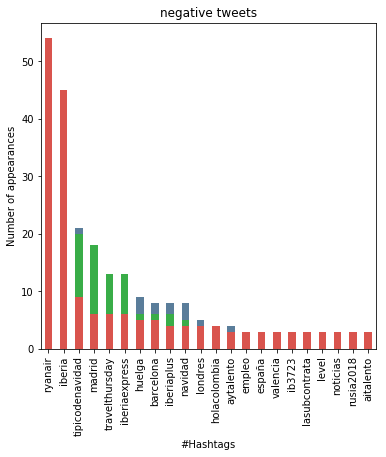

In [92]:
keys = ['neutral','positive','negative']
for key in keys:
    subhisto = histogram[key]
    sortlargest = subhisto[histogram[key] > 2].sort_values(ascending=False)
    # Plot
    barcolor = {'positive':sns.xkcd_rgb["medium green"],'negative':sns.xkcd_rgb["pale red"],'neutral':sns.xkcd_rgb["steel blue"]}
    ax = sortlargest.plot(kind='bar',title=key+' tweets',color=barcolor[key])
    ax.set_ylabel('Number of appearances')
    ax.set_xlabel('#Hashtags')
    ax.set_xticks(np.arange(len(sortlargest)))
    ax.set_xticklabels(sortlargest.index.values, rotation=90)
    
    fig = plt.gcf()
    fig.set_size_inches(6,6)
    fig.savefig('hashtags'+key+'.jpg', bbox_inches='tight',dpi=300)

In [93]:
# Drop data gaps in column 'users'
df2 = df.dropna(subset=['users'])
# Dataframe sentiment vs. users
sentiment_users = df2.set_index('airline_sentiment').users.str.split(r'|', expand=True).stack().reset_index(level='airline_sentiment')
sentiment_users.columns = ['airline_sentiment','users']
# Dataframe users vs. sentiment, where multiple users have 
# replicated sentiments 
df3 = sentiment_users.set_index('users')
# One-hot encoding for airline sentiment
counted = pd.get_dummies(df3['airline_sentiment'])
histogram = counted.groupby('users').sum()
histogram.head(4)

,negative,neutral,positive
users,,,
/ryanair,1.0,0.0,0.0
007doctorno,0.0,0.0,1.0
1961_pilar,0.0,0.0,1.0
1976agus,0.0,0.0,1.0


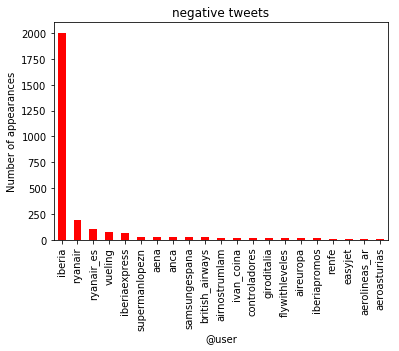

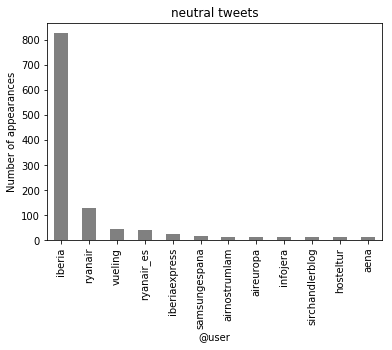

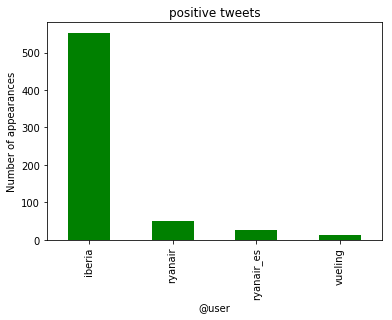

In [94]:
def plot_histo(key):
    subhisto = histogram[key]
    sortlargest = subhisto[histogram[key] > 10].sort_values(ascending=False)
    # Plot
    barcolor = {'positive':'g','negative':'r','neutral':'gray'}
    ax = sortlargest.plot(kind='bar',title=key+' tweets',color=barcolor[key])
    ax.set_ylabel('Number of appearances')
    ax.set_xlabel('@user')
    ax.set_xticks(np.arange(len(sortlargest)))
    ax.set_xticklabels(sortlargest.index.values, rotation=90)
    plt.show()
    return

keys = ['negative','neutral','positive']
for key in keys:
    plot_histo(key)

Hahstags and users contain mostly airline information. Hahstags like #holacolombia could be advertisment campaings (we could check how many tweets are identical or almost identical)... When did they started? Time evolution of the campaing?

# Most common airlines

In [95]:
def cleaning(tweet):
    # Remove numbers
    tweet = re.sub(r'\d+','',tweet)
    # Remove punctuation (includes @ and #)
    regex = re.compile('[%s]' % re.escape(string.punctuation+u"¡"+u"¿"+u"€"))
    tweet = re.sub(regex,'',tweet)
    #Remove white spaces
    tweet = re.sub('\s+', '', tweet)
    return tweet

df['cleantext'] = df['text'].apply(cleaning)
df.head()

,tweet_created,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_location,user_timezone,newairline_sentiment,users,hashtags,cleantext
tweet_id,,,,,,,,,,,,,
942743012337123328,2017-12-18 13:07:04,positive,False,0,0,"""los pilotos de ryanair desconvocan la huelga ...",NaN,NaN,Dublin,positive,NaN,NaN,lospilotosderyanairdesconvocanlahuelgatrasverr...
926857871916183553,2017-11-04 17:05:11,positive,True,0,0,"@iberia @lavecinarubia si ,por favor las decla...",NaN,NaN,NaN,positive,iberia|lavecinarubia,rubijarena,iberialavecinarubiasiporfavorlasdeclaracionesd...
936979305720090626,2017-12-02 15:24:09,neutral,True,0,0,@iberia me dirías por favor que costo tiene?,NaN,NaN,NaN,neutral,iberia,NaN,iberiamediríasporfavorquecostotiene
943983853802328064,2017-12-21 23:17:43,negative,True,0,0,"@supermanlopezn @iberia @giroditalia champion,...",NaN,NaN,Central Time (US & Canada),negative,supermanlopezn|iberia|giroditalia,NaN,supermanlopezniberiagiroditaliachampionnovuele...
938207464457211904,2017-12-06 00:44:25,negative,True,0,0,@safarrelldm @klm @iberia eso de anca es verda...,NaN,NaN,Eastern Time (US & Canada),negative,safarrelldm|klm|iberia,NaN,safarrelldmklmiberiaesodeancaesverdadmimamalep...


In [96]:
def joinstrings(frame):
    onestring = ''.join(frame['cleantext'].str.lower())
    return onestring
all_text = df.groupby('airline_sentiment').apply(joinstrings)
all_text['positive']

'lospilotosderyanairdesconvocanlahuelgatrasverreconocidossussindicatoselpaísúltimasnoticias…iberialavecinarubiasiporfavorlasdeclaracionesdeamorentrelosrubijarenanopuedenquedarseenunama…coniberiamidestinounsoloclickdeseadmesueeholacolombiaholadestinoseuropeosalmejorprecioryanairreconocerálossindicatosporprimeravezensuhistoriavíacapitalradiobiberiaampliaráofeadeasientosméxicoargentinacolombiaturismoméxicopromociónvuelosryanaireuropadesdeeurostusofeasiberiagraciasporlainformaciónaños🎂muchosvuelos🛫muchasfelicidades😉iberiaaniversarioflotaiberiahistoria…fromournetworkiberiaofrecerádesdenoviembrelaclaseturistapremiumensusrutaslima……ryanairreconocerálossindicatosdepilotosparaevitaruncolapsodesusoperacionesennavidad…estoschicxsdeiberiasontozudosnotiranlatoallahastaqueconsiguensolucionarlapeticióndeuncliente…seleccióndetripulantesdecabinaensevillamálagagranadaparalacompañíaryanairryanairesconsiguetussueñosconryanair🛫🛫🛫iberiaairnostrumaumentaránunlaofeadeplazasmadridenchepdanoneiberiaunenesfuerzo

We read a list of airlines from https://openflights.org/data.html and neglect those that are listed as non-active nowadays.

In [97]:
airlines = pd.read_csv('airlines/airlines.dat', encoding='latin-1',index_col='Airline ID',sep=',')
airlines.columns.tolist()
#airlines[3700:4000]

['Name', 'Alias', 'IATA', 'ICAO', 'Callsign', 'Country', 'Active']

In [98]:
# Drop non-active airlines
active_airlines = airlines.drop(airlines.index[(airlines.Active == 'N')])
# Drop airlines with missing data
active_airlines = active_airlines.dropna()
# Save list of active complete airlines
airlines_list = active_airlines['Name'].str.lower()
#Remove white spaces
airlines_list= [re.sub('\s+', '',a) for a in airlines_list]

In [99]:
#airlines_list = airlines_list.tolist()
print(airlines_list[20:30])

['azerbaijanairlines', 'avies', 'airblue', 'airberlin', 'airindialimited', 'airbourbon', 'airatlantaicelandic', 'airtahitinui', 'arkiaisraelairlines', 'airjamaica']


In [100]:
import re

def extract_popular_airlines(frame):
    keys = ['positive','negative','neutral']

    for key in keys:
        occ = dict()
        for airline in airlines_list:
            counts = len(re.findall(airline,all_text[key]))
            print (airline, counts)
            if(counts > 0): occ[airline] = counts
        print(key)
        print(occ.keys())
        return occ
#        for w in sorted(occ, key=occ.get, reverse=True):

airlines_in_tweets = all_text.apply(extract_popular_airlines)

alohaairlines 0
americanairlines 1
asianaairlines 0
askariaviation 0
absa-aerolinhasbrasileiras 0
adriaairways 0
aireuropa 16
aegeanairlines 0
aerosvitairlines 0
airitaly 0
aeroflotrussianairlines 0
airbosna 0
airfrance 0
aircaledonieinternational 0
aircargocarriers 0
airnamibia 0
aerolitoral 0
airglaciers 0
aeroper 0
atlasblue 0
azerbaijanairlines 0
avies 0
airblue 0
airberlin 0
airindialimited 0
airbourbon 0
airatlantaicelandic 0
airtahitinui 0
arkiaisraelairlines 0
airjamaica 0
airone 0
airsahara 0
airmalta 0
airjapan 0
americawestairlines 0
airwisconsin 0
tatarstanairlines 0
airmalawi 0
airmacau 0
airseychelles 0
aeromã©xico 0
allnipponairways 0
airnostrum 13
airniugini 0
airarabia 0
aircanada 0
airbaltic 0
airnippon 0
airnorth 0
airnorthcharter-canada 0
airnewzealand 0
alitaliaexpress 0
aeroflight 0
arrowair 0
aerocondor 0
aerolineasargentinas 0
alaskaairlines 0
airsinai 0
atlanticsoutheastairlines 0
astrakhanairlines 0
airtanzania 0
airburkina 0
airlinesoftasmania 0
austrianairli

virginexpress 0
virginnigeriaairways 0
virginatlanticairways 0
vivamacau 0
volareairlines 0
vuelingairlines 0
vladivostokair 0
variglog 0
virginaustralia 0
vrglinhasaereas 0
vasp 1
vlmairlines 0
webjetlinhasa 0
welcomeair 0
westjet 1
westernairlines 0
widerã¸e 0
windjet 0
wingsair 0
wizzair 1
wizzairhungary 0
worldairways 0
xlairwaysfrance 0
xiamenairlines 0
yamalairlines 0
yemenia 0
zoomairlines 0
tyroleanairways 0
maldivianairtaxi 0
skyexpress 0
airbusan 0
redwings 0
gabonairlines 0
epicholiday 0
salzburgarrows 0
dennissky 0
worldexperienceairline 0
panamworldairwaysdominicana 0
brazilair 0
ksy 0
sochiair 0
tom\\'s&coairliners 0
lsmairlines 0
lionxpress 0
domenicanairlines 0
lsmairlines 0
zabaykalskiiairlines 0
marysyaairlines 0
zabaikalairlines 0
flybrasil 0
himalayanairlines 0
indyaairlinegroup 0
skyregional 0
lsminternational 0
luchshairlines 0
mongolianinternationalairlines 0
nextbrasil 0
aeroworld 0
usaskycargo 0
marusyaairways 0
airrussia 0
airindus 0
michaelairlines 0
zenithin

ryanair 340
rã©gional 0
satainternational 0
southafricanairways 0
shaheenairinternational 0
scandinavianairlinessystem 0
s7airlines 0
seaborneairlines 0
srilankanairlines 0
suncountryairlines 0
skyexpress 0
spicejet 0
starflyer 0
skagwayairservice 0
sataairacores 0
singaporeairlines 0
sibaviatrans 0
skynetairlines 0
sriwijayaair 0
samaairlines 0
singaporeairlinescargo 0
siemreapairways 0
southeastasianairlines 0
skyserviceairlines 0
serviciosdetransportesa 0
sudanairways 0
saudiarabianairlines 0
southwestairlines 0
southernwindsairlines 0
swissinternationalairlines 0
swissair 0
swefly 0
sunexpress 0
syrianarabairlines 0
skywalkairlines 0
shandongairlines 0
springairlines 0
sichuanairlines 0
shanghaiairlines 0
shenzhenairlines 0
sund'or 0
skyeurope 0
spanair 6
spiritairlines 1
satena 0
santabarbaraairlines 0
skyairline 0
skywest 0
skywaysexpress 0
skymarkairlines 0
silkair 0
surinamairways 0
sterlingairlines 0
skynetasiaairways 0
solomonairlines 0
saratovaviationdivision 0
satairlines 0

klm 3
kamair 0
kavminvodyavia 0
kenmoreair 0
kenyaairways 0
kingfisherairlines 0
kishair 0
kogalymaviaaircompany 0
koreanair 0
krasnojarskyairlines 0
kubanairlines 0
kuwaitairways 0
kuzuairlinescargo 0
lacsa 0
lanairlines 0
lanargentina 0
lanexpress 0
lanperu 0
lotpolishairlines 0
lteinternationalairways 0
ltuaustria 0
laoairlines 0
laudaair 0
leewardislandsairtransport 0
libyanarabairlines 0
linhasa 0
lionmentariairlines 0
luftfahrtgesellschaftwalter 0
lufthansa 2
lufthansacargo 0
lufthansacityline 0
lufttransport 0
luxair 0
masair 0
matmacedonianairlines 0
miatmongolianairlines 0
mngairlines 0
mahanair 0
malaysiaairlines 0
malmã¶aviation 0
maltaaircharter 0
malã©v 0
mandalaairlines 0
mandarinairlines 0
mango 0
martinair 0
maxair 0
mayaislandair 0
meridiana 0
merpatinusantaraairlines 0
mesaairlines 0
mesabaairlines 0
mexicanadeaviaci 0
middleeastairlines 0
midwayairlines 0
moldavianairlines 0
monarchairlines 0
montenegroairlines 0
moskoviaairlines 0
motorsich 0
mytravelairways 0
myanm

In [101]:
allnames = list(airlines_in_tweets['positive'].keys())+list(airlines_in_tweets['negative'].keys())+list(airlines_in_tweets['neutral'])
#print(allnames)
sorted(list(set(allnames)))

['aeromar',
 'aireuropa',
 'airnostrum',
 'americanairlines',
 'britishairways',
 'easyjet',
 'emirates',
 'eurowings',
 'flybe',
 'iberia',
 'klm',
 'lufthansa',
 'niki',
 'norwegian',
 'qatar',
 'ryanair',
 'spanair',
 'spiritairlines',
 'tame',
 'vasp',
 'volaris',
 'westjet',
 'wizzair']

In [102]:
print(list(airlines_in_tweets['neutral']))

['americanairlines', 'aireuropa', 'airnostrum', 'aeromar', 'britishairways', 'emirates', 'eurowings', 'easyjet', 'flybe', 'iberia', 'klm', 'lufthansa', 'niki', 'norwegian', 'qatar', 'ryanair', 'spanair', 'spiritairlines', 'tame', 'volaris', 'vasp', 'westjet', 'wizzair']
